In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Outliers

In [2]:
df = pd.read_pickle('full_no_repo_dups.pkl')

In [3]:
df.head()

,nb_id,repo_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
79,106,165198456,False,0.930911,0.363636,1.0,0.000000,True,True,3.0,0.545455,0.75,4.500000,False,False,2.0,False,False,False,1.0
81,108,165197188,False,1.000000,0.560000,1.0,0.000000,True,True,1.0,0.000000,1.00,1.913043,False,False,6.0,False,False,False,1.0
88,116,165201963,False,1.000000,0.666667,1.0,0.187500,True,True,1.0,0.041667,1.00,1.227273,False,False,8.0,False,False,False,0.0
89,117,165200414,False,1.000000,0.000000,1.0,0.000000,True,True,1.0,1.000000,1.00,0.000000,False,True,0.0,False,False,False,0.0
92,120,165200582,False,1.000000,0.545455,0.0,0.833333,False,True,2.0,0.000000,1.00,1.222222,False,True,0.0,False,False,False,0.0


In [4]:
len(df)

18178

In [5]:
quant_vars = [df.columns[i] for i in [3, 4, 5, 6, 9, 10, 11, 12, 15, 19]]
quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

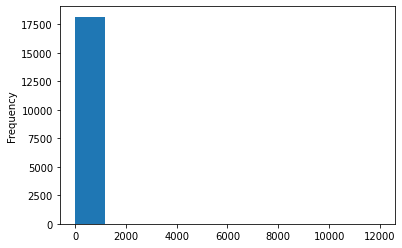

In [8]:
df['num_stars'].plot(kind = 'hist')

In [134]:
to_filter = set()
outliers = df.nsmallest(2000, ['jupyter_prop'], keep='all')
to_filter.update(outliers['nb_id'])

In [135]:
outliers = df.nlargest(100, ['num_contrib'], keep='all')
to_filter.update(outliers['nb_id'])

In [136]:
outliers = df.nlargest(250, ['num_commits'], keep='all')
to_filter.update(outliers['nb_id'])

In [137]:
outliers = df.nsmallest(250, ['exec_inorder'], keep='all')
to_filter.update(outliers['nb_id'])

In [138]:
outliers = df.nlargest(250, ['exec_skips'], keep='all')
to_filter.update(outliers['nb_id'])

In [139]:
outliers = df.nlargest(100, ['num_functions'], keep='all')
to_filter.update(outliers['nb_id'])

In [144]:
outliers = df.nlargest(500, ['num_stars'], keep='all')
to_filter.update(outliers['nb_id'])

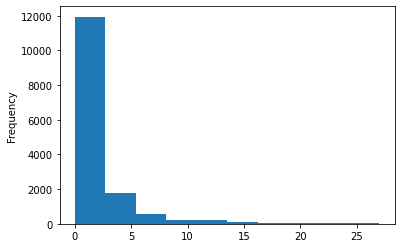

In [156]:
new_df = df[~df['nb_id'].isin(list(to_filter))]
new_df['num_stars'].plot(kind = 'hist')

In [157]:
len(new_df)

14999

In [159]:
new_df.to_pickle('full_reduced_outliers.pkl')
new_df.to_csv('csv-files/full_reduced_outliers.csv')

# Check Distance + Normalize

In [15]:
df = pd.read_pickle('full_reduced_outliers.pkl')

In [16]:
quant_vars = [df.columns[i] for i in [3, 4, 5, 6, 9, 10, 11, 12, 15, 19]]
quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

In [17]:
quant_df = df[quant_vars]

In [18]:
for col in quant_df.columns:
    avg = quant_df[col].mean()
    print(col, avg)
    quant_df[col] = quant_df[col].apply(lambda x : (x - avg) ** 2)

jupyter_prop 0.9847532777816409
output_cell_prop 0.5104937352920219
num_contrib 1.2349489965997733
image_prop 0.33600748352861126
num_commits 1.7303153543569572
non_exec_prop 0.16496533072484973
exec_inorder 0.9438430995626165
exec_skips 4.646672865958805
num_functions 4.10754050270018
num_stars 1.9061270751383426


/home/potato/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
quant_df.head()

,jupyter_prop,output_cell_prop,num_contrib,image_prop,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_stars
79,0.002899,0.021567,0.055201,0.112901,1.612099,0.144772,0.037575,0.021513,4.441727,0.821066
81,0.000232,0.002451,0.055201,0.112901,0.533361,0.027214,0.003154,7.472730,3.581403,0.821066
88,0.000232,0.024390,0.055201,0.022054,0.533361,0.015203,0.003154,11.692297,15.151241,3.633320
89,0.000232,0.260604,0.055201,0.112901,0.533361,0.697283,0.003154,21.591569,16.871889,3.633320
92,0.000232,0.001222,1.525099,0.247333,0.072730,0.027214,0.003154,11.726862,16.871889,3.633320


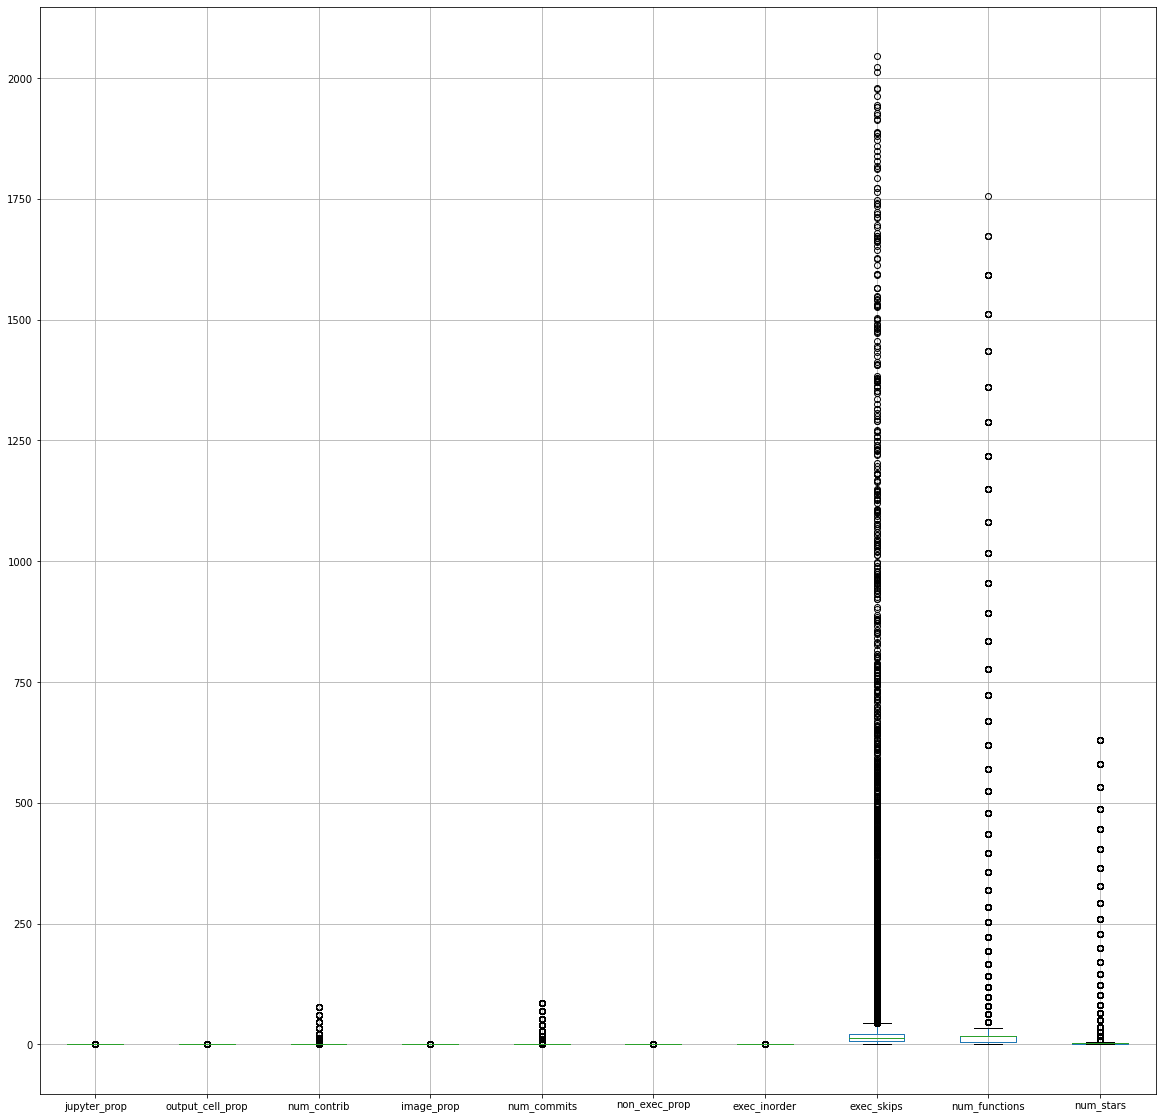

In [24]:
plt.figure(figsize=(20, 20))
quant_df.boxplot()

In [46]:
original_df = pd.read_pickle('full_reduced_outliers.pkl')

In [47]:
quant_vars = [original_df.columns[i] for i in [3, 4, 5, 6, 9, 10, 11, 12, 15, 19]]
quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

In [48]:
for quant_var in quant_vars:
    original_df[quant_var] = original_df[quant_var].transform(lambda x : 1 / (1 + math.exp(-x)))

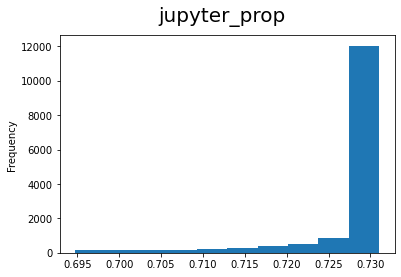

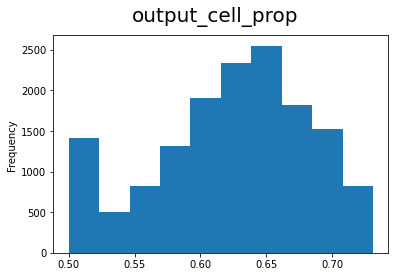

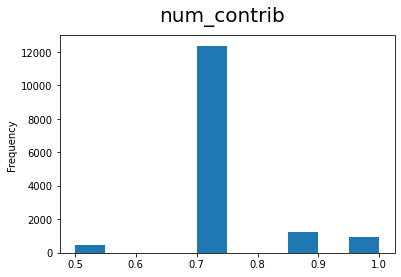

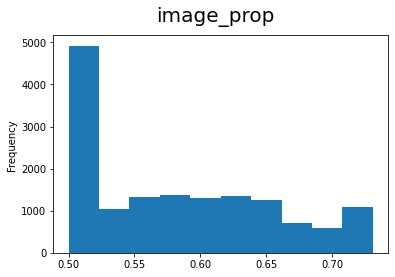

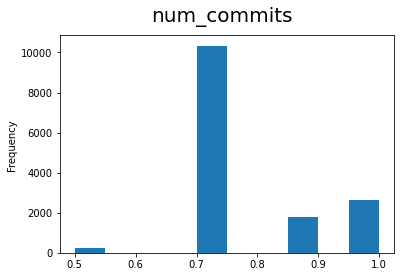

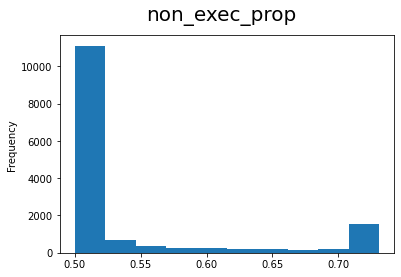

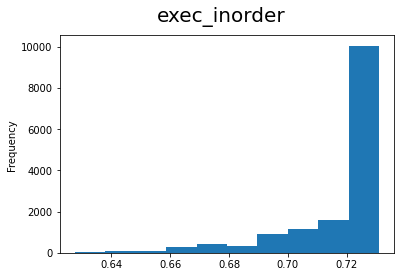

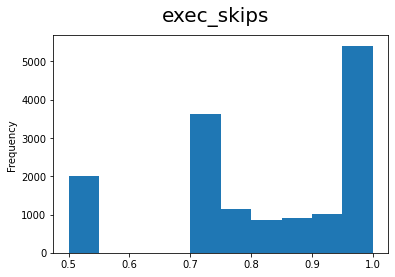

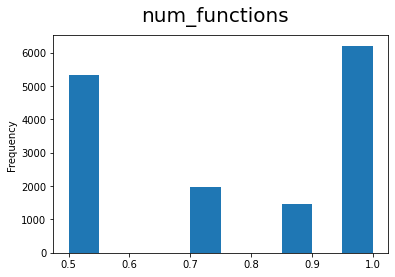

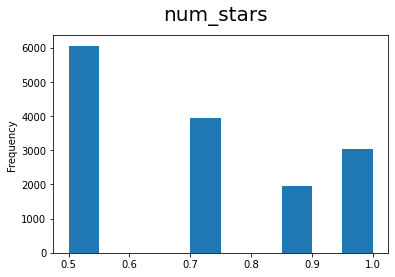

In [49]:
for quant_var in quant_vars:
    original_df[quant_var].plot(kind = 'hist')
    plt.suptitle(quant_var, fontsize=20)
    plt.show()

In [50]:
original_df.to_pickle('full_normalized.pkl')
original_df.to_csv('csv-files/full_normalized.csv')

In [51]:
original_df = pd.read_pickle('full_reduced_outliers.pkl')

In [52]:
quant_vars = [original_df.columns[i] for i in [3, 4, 5, 6, 9, 10, 11, 12, 15, 19]]
quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

In [53]:
for quant_var in quant_vars:
    original_df[quant_var] = original_df[quant_var].transform(lambda x : math.log(x + 1))
    original_df[quant_var] = original_df[quant_var].transform(lambda x : 1 / (1 + math.exp(-x)))

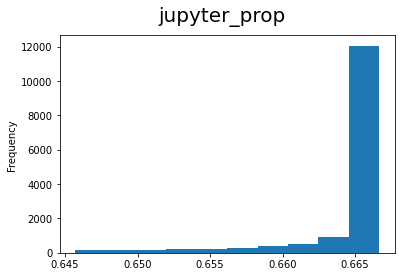

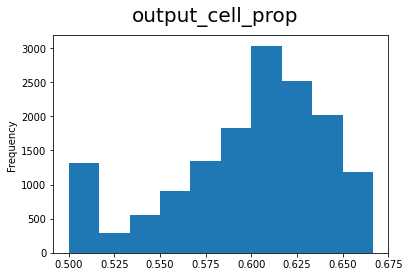

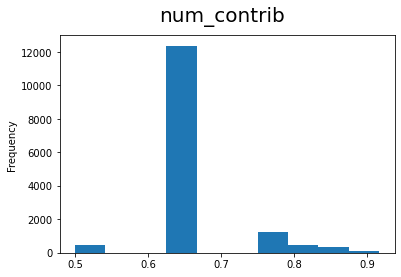

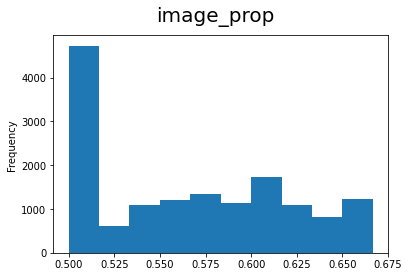

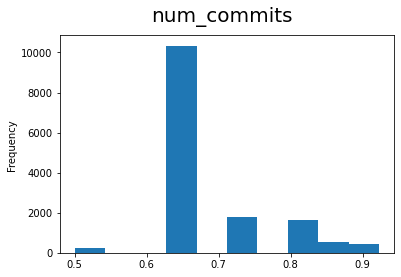

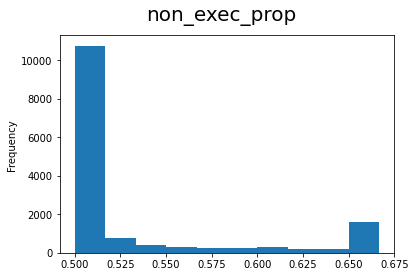

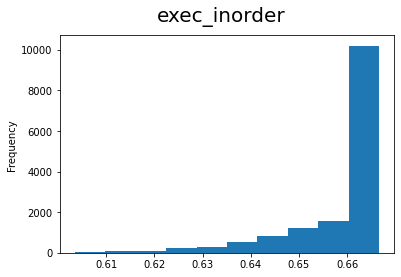

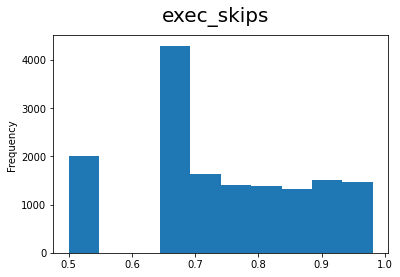

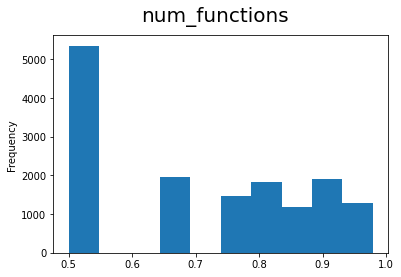

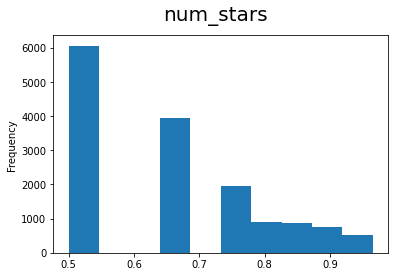

In [54]:
for quant_var in quant_vars:
    original_df[quant_var].plot(kind = 'hist')
    plt.suptitle(quant_var, fontsize=20)
    plt.show()

In [55]:
original_df.to_pickle('full_log_normalized.pkl')
original_df.to_csv('csv-files/full_log_normalized.csv')

In [56]:
original_df = pd.read_pickle('full_reduced_outliers.pkl')

In [58]:
quant_vars = [original_df.columns[i] for i in [3, 4, 5, 6, 9, 10, 11, 12, 15, 19]]
quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

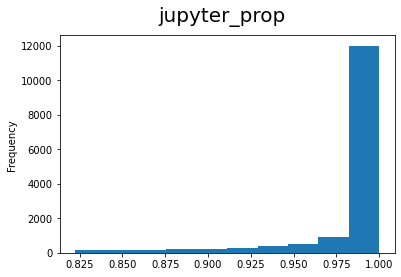

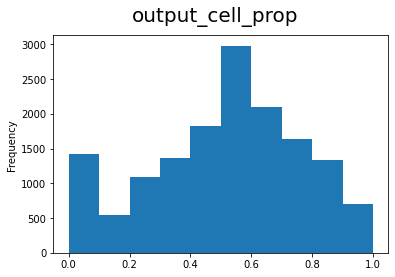

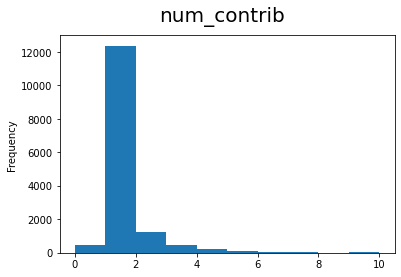

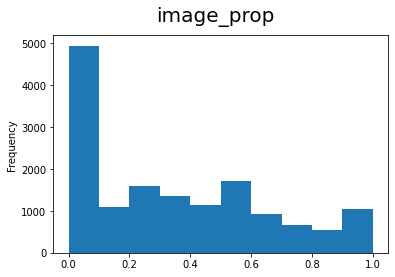

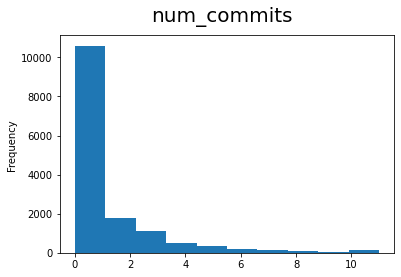

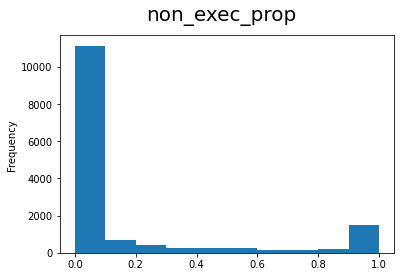

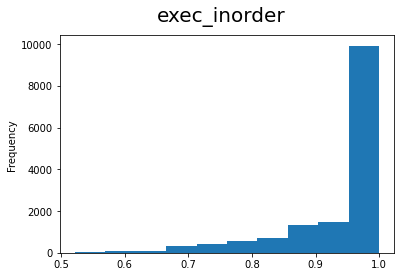

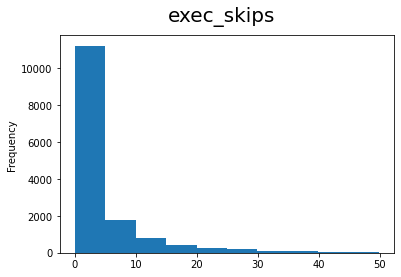

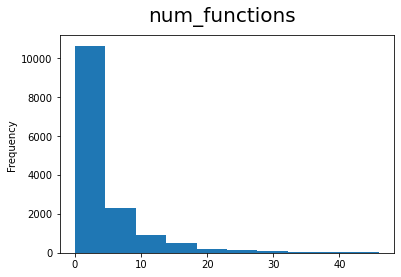

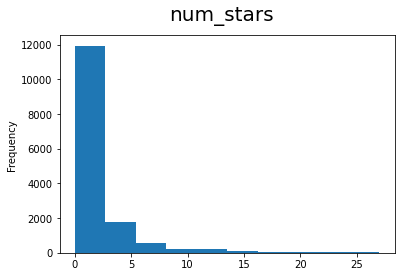

In [59]:
for quant_var in quant_vars:
    original_df[quant_var].plot(kind = 'hist')
    plt.suptitle(quant_var, fontsize=20)
    plt.show()